**Table of contents**<a id='toc0_'></a>    
- [Loading the data](#toc1_1_1_1_)    
- [Overview of Cable Roads](#toc1_1_1_2_)    
- [Single CR with Relief](#toc1_1_1_3_)    
- [The Influence of Pulling Force on Slope](#toc1_1_1_4_)    
- [Forces on Anchor Tree and Tower Change According to Force and Angle](#toc1_1_1_5_)    
- [Resulting Force on Support per Angle and Incoming Force](#toc1_1_1_6_)    
- [Surface Plots of Mechanical Functions](#toc1_1_1_7_)    
- [Experimental Code Execution Visualization](#toc1_1_1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

#### <a id='toc1_1_1_1_'></a>[Loading the data](#toc0_)

In [1]:
# Package Imports
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

from importlib import reload

from ipywidgets import interact, IntSlider

import plotly.graph_objects as go
import plotly.express as px
from plotly_gif import GIF, capture

%matplotlib widget

# Importing my modules
from src import plotting, geometry_operations, geometry_utilities, cable_road_computation, mechanical_computations

In [2]:
%store -r line_gdf
%store -r height_gdf
%store -r tree_gdf
height_gdf_small = height_gdf.iloc[::100]

In [32]:
%store -r line_gdf_full

In [72]:
line_gdf_full_small = line_gdf_full.iloc[::10]

NameError: name 'line_gdf_full' is not defined

#### <a id='toc1_1_1_2_'></a>[Overview of Cable Roads](#toc0_)

In [33]:
fig = px.scatter_3d(x=height_gdf_small["x"], y=height_gdf_small["y"], z=height_gdf_small["elev"])
fig.update_traces(marker={'size': 0.75})
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), width=1000,height=800, title="Relief Map with possible Cable Roads")

for index in range(len(line_gdf_full)):
    print(line_gdf_full.iloc[index].geometry)
    start_point = Point(line_gdf_full.iloc[index].geometry.coords[0])
    end_point = (line_gdf_full.iloc[index].geometry.coords[1])
    supports = line_gdf_full.iloc[index].location_of_int_supports

    waypoints = [start_point, *supports, end_point]
    for previous, current in zip(waypoints, waypoints[1:]):
        

        # sample_line = line_gdf_full.iloc[index].geometry
        sample_line = LineString([previous, current])
        sample_cable_road = cable_road_computation.compute_initial_cable_road(sample_line,height_gdf, line_gdf_full.iloc[index]["current_tension"])
        sample_cable_road.s_current_tension = 50000
        mechanical_computations.calculate_sloped_line_to_floor_distances(sample_cable_road)
        x_sample_cr = [point[0] for point in sample_cable_road.floor_points]
        y_sample_cr = [point[1] for point in sample_cable_road.floor_points]
        z_floor_height = sample_cable_road.floor_height_below_line_points
        z_line_to_floor = sample_cable_road.floor_height_below_line_points+sample_cable_road.line_to_floor_distances
        z_sloped= sample_cable_road.floor_height_below_line_points+sample_cable_road.sloped_line_to_floor_distances

        # fig = px.line_3d(x=x_sample_cr, y=y_sample_cr, z=z_floor_height)
        # fig.add_trace(go.Scatter3d(x=x_sample_cr, y=y_sample_cr, z=z_line_to_floor, mode='lines', line=dict(color='red', width=2), name='Straight Line Distance'))
        fig.add_trace(go.Scatter3d(x=x_sample_cr, y=y_sample_cr, z=z_sloped, mode='lines', line=dict(width=3)))

fig.show("notebook_connected")

LINESTRING (-29.880646898378075 -8.757599103801436, -106.0132132 89.40781657)
Computing initial cable road
initialize_line_tension
LINESTRING (-26.335098015859195 -6.90860167578362, -83.48467459 95.86970097)
Computing initial cable road
initialize_line_tension
LINESTRING (-26.335098015859195 -6.90860167578362, -83.96798843 102.8353679)
Computing initial cable road
initialize_line_tension
LINESTRING (-26.335098015859195 -6.90860167578362, -83.3753646 106.9914629)
Computing initial cable road
initialize_line_tension
LINESTRING (-26.335098015859195 -6.90860167578362, -87.31261084 111.5093353)
Computing initial cable road
initialize_line_tension
LINESTRING (-24.572446093973856 -5.963584108606202, -72.9690587 113.7228677)
Computing initial cable road
initialize_line_tension
Computing initial cable road
initialize_line_tension
LINESTRING (-24.572446093973856 -5.963584108606202, -74.75674 104.7006)
Computing initial cable road
initialize_line_tension
LINESTRING (-22.809794172088516 -5.0185665

In [6]:
# fig.write_html("02_Figures/All_Cable_Roads_with_Relief.html")

#### <a id='toc1_1_1_3_'></a>[Single CR with Relief](#toc0_)

In [4]:
# Setting up a sample cable road
index = 5
sample_line = line_gdf.iloc[index].geometry
sample_cable_road = cable_road_computation.compute_initial_cable_road(sample_line,height_gdf, pre_tension=line_gdf.iloc[index].current_tension)
sample_cable_road.s_current_tension = line_gdf.iloc[index].current_tension
mechanical_computations.calculate_sloped_line_to_floor_distances(sample_cable_road)

Computing initial cable road
initialize_line_tension


In [4]:
reload(plotting)
plotting.plot_cr_relief(sample_cable_road, line_gdf,height_gdf, index)

Computing initial cable road
initialize_line_tension
Computing initial cable road
initialize_line_tension
Computing initial cable road
initialize_line_tension


In [4]:
# Setting up a sample cable road
index = 5
sample_line = line_gdf.iloc[index].geometry
sample_cable_road = cable_road_computation.compute_initial_cable_road(sample_line,height_gdf, line_gdf.iloc[index].current_tension)
sample_cable_road.s_current_tension = line_gdf.iloc[index].current_tension
mechanical_computations.calculate_sloped_line_to_floor_distances(sample_cable_road)

Computing initial cable road
initialize_line_tension


In [53]:
reload(plotting)
plotting.plot_supported_cr_relief(sample_cable_road, line_gdf, height_gdf, index)

Computing initial cable road
initialize_line_tension
Computing initial cable road
initialize_line_tension
Computing initial cable road
initialize_line_tension
Computing initial cable road
initialize_line_tension
Computing initial cable road
initialize_line_tension


#### <a id='toc1_1_1_4_'></a>[The Influence of Pulling Force on Slope](#toc0_)

In [11]:
from plotly.subplots import make_subplots

xmin, xmax, nx = 0.0, 100.0, 57
x = np.linspace(xmin, xmax, nx)

sample_cable_road.s_current_tension= 10
mechanical_computations.calculate_sloped_line_to_floor_distances(sample_cable_road)
y = sample_cable_road.sloped_line_to_floor_distances

fig = go.FigureWidget(make_subplots(rows=1, cols=2))
sloped_ltfd = fig.add_scatter(x=x,
                      y=y, name="Distance to Floor")
sloped_ltfd_pestal = fig.add_scatter(x=x,
                      y=y, name="Pestal Load Path")


force = 5000
fig.add_trace(go.Bar(x=[0], y=[force], name="Force"),row=1, col=2)

fig.update_layout(title='Cable Road Slope',
                    xaxis_title='Width in Meters',
                    yaxis_title='Height in Meters',
                    yaxis=dict(range=[-300, 100]),
                    xaxis=dict(range=[-10,110]),
                    yaxis2=dict(range=[-10,20000]),
                    width=1200,height=400)

gif = GIF()

@capture(gif)
@interact(force=(0, 20000, 100))
def update(force=5000):
    sample_cable_road.s_current_tension = force
    mechanical_computations.calculate_sloped_line_to_floor_distances(sample_cable_road)
    y = sample_cable_road.sloped_line_to_floor_distances
    fig.data[0].y = y

    y_x_deflections_pestal = np.asarray([
        mechanical_computations.pestal_load_path(
            sample_cable_road, point
        )
        for point in sample_cable_road.points_along_line
    ])

    fig.data[1].y=-y_x_deflections_pestal
    fig.data[2].y=[force]
    fig.show()
    # return fig

# fig.write_html("02_Figures/Cable_Road_Slope.html")
fig.show("notebook_connected")

interactive(children=(IntSlider(value=5000, description='force', max=20000, step=100), Output()), _dom_classes…

In [12]:
# n = 10000
# r1 = range(0, n, 100)
# r2 = range(n, 0, -100)
# for i in [*r1, *r2]:
#     # Changes the range of the data each step to make it look like a time series
#     update(i)

# # Create gif
# gif.create_gif()

In [13]:
# display(Image(data=open("02_Figures/Cable_Road_Slope.gif",'rb').read(), format='png'))

#### <a id='toc1_1_1_5_'></a>[Forces on Anchor Tree and Tower Change According to Force and Angle](#toc0_)

interactive(children=(IntSlider(value=2, description='index', max=5), IntSlider(value=50000, description='forc…

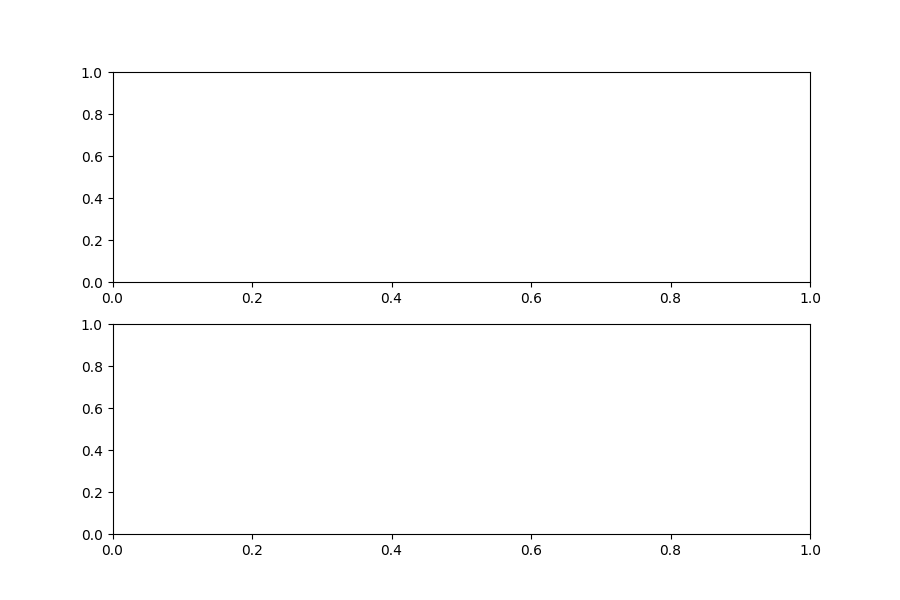

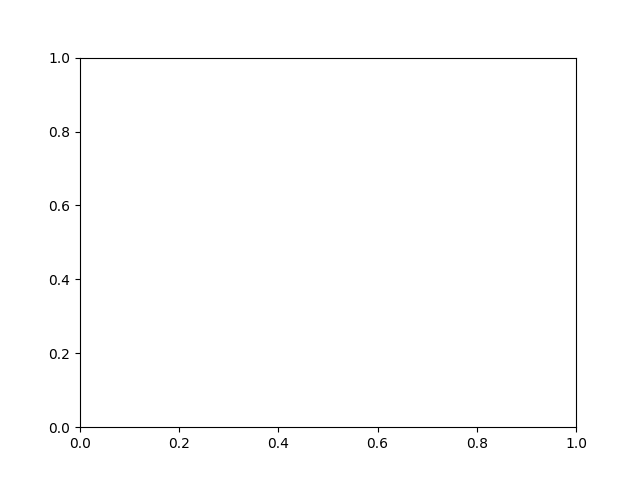

In [3]:
# Checking the anchor trees
reload(mechanical_computations)
reload(geometry_operations)
reload(plotting)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6)) # two rows, one column
fig, ax3 = plt.subplots()
index = 3

def plot_anchors_hold(index, force):
    sample_cable_road = cable_road_computation.compute_initial_cable_road(line_gdf.iloc[index].geometry,height_gdf, pre_tension=line_gdf.iloc[index].current_tension)
    sample_cable_road.s_current_tension = force
    mechanical_computations.check_if_tower_and_anchor_trees_hold(sample_cable_road,line_gdf.iloc[index].max_supported_force, line_gdf.iloc[index].possible_anchor_triples, height_gdf, ax, ax2, ax3)
    fig.canvas.draw()
    
interact(plot_anchors_hold, index=IntSlider(min=0, max=len(line_gdf), step=1, value=2), force=IntSlider(min=50000, max=100000, step=1000, value=1000));

In [12]:
# Setting up a sample cable road
index = 1
sample_line = line_gdf.iloc[index].geometry
sample_cable_road = cable_road_computation.compute_initial_cable_road(sample_line,height_gdf, line_gdf.iloc[index].current_tension)
sample_cable_road.s_current_tension = line_gdf.iloc[index].current_tension
mechanical_computations.calculate_sloped_line_to_floor_distances(sample_cable_road)

Computing initial cable road
initialize_line_tension


checking if tower and anchor trees hold
Computing initial cable road
initialize_line_tension
computing tension loaded vs unloaded cable road
Angle: 11.776097601035588
Force on loaded cable: 15387.75775494776
force on anchor 25952.297607553937
force on twoer 53014.98344916217
max supported force by anchor 3248548.46690094
200000


True

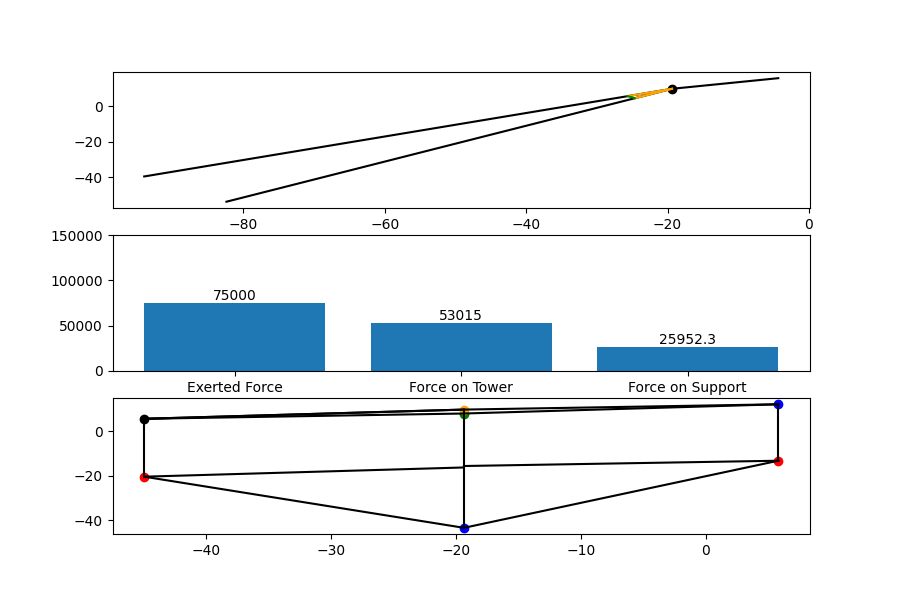

In [13]:
reload(mechanical_computations)
reload(plotting)
fig, (ax, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 6)) # two rows, one column
mechanical_computations.check_if_tower_and_anchor_trees_hold(sample_cable_road,line_gdf.iloc[index].max_holding_force, line_gdf.iloc[index].possible_anchor_triples, height_gdf, ax=ax, ax2=ax2, ax3=ax3)

In [29]:
reload(mechanical_computations)
reload(cable_road_computation)
index = 1
scaling_factor = 10000
left_line = LineString([Point(line_gdf.iloc[index].geometry.coords[0]), line_gdf.iloc[index].location_of_int_supports[0]])
left_cr = cable_road_computation.compute_initial_cable_road(left_line,height_gdf, pre_tension=line_gdf.iloc[index].current_tension)

right_line = LineString([line_gdf.iloc[index].location_of_int_supports[0], Point(line_gdf.iloc[index].geometry.coords[1])])
right_cr = cable_road_computation.compute_initial_cable_road(right_line,height_gdf, pre_tension=line_gdf.iloc[index].current_tension)


center_point_xz = Point(left_cr.end_point.coords[0][0], left_cr.end_point_height)
fig, (ax) = plt.subplots(1, 1, figsize=(9, 6)) # two rows, one column
fig.set_dpi(150)
mechanical_computations.compute_tension_loaded_vs_unloaded_cableroad(left_cr, right_cr, center_point_xz, scaling_factor, ax)
# mechanical_computations.compute_tension_loaded_vs_unloaded_cableroad(right_cr, left_cr, center_point_xz, scaling_factor, ax)

IndexError: list index out of range

In [25]:
reload(mechanical_computations)
mechanical_computations.check_if_support_withstands_tension(1,left_cr.end_point_height,100000,left_cr, right_cr)

TypeError: check_if_support_withstands_tension() takes 4 positional arguments but 5 were given

#### <a id='toc1_1_1_6_'></a>[Resulting Force on Support per Angle and Incoming Force](#toc0_)

In [ ]:
unloaded_tangent_line_x = [0, 100000]
unloaded_tangent_line_y = [0, 0]
loaded_tangent_line_x = [0, 100000]
loaded_tangent_line_y = [0, 0]
force_on_support_x = [0, 0]
force_on_support_y = [0, 0]

fig = go.FigureWidget()
bar = fig.add_scatter(x=[*unloaded_tangent_line_x,*loaded_tangent_line_x,*force_on_support_x],
                      y=[*unloaded_tangent_line_y,*loaded_tangent_line_y,*force_on_support_y])

bar.update_layout(title='Resulting Force per Angle',xaxis_title='Force Vector on Support',
                    yaxis_title='Force Vector on Cable',
                    yaxis=dict(range=[-100000, 10]),
                    xaxis=dict(range=[-10,100000]))

gif = GIF()

@capture(gif)
@interact(force=(0, 100000, 1000), angle=(0, 50, 1))
def update(force=10000, angle=30):
    res = mechanical_computations.parallelverschiebung(force, angle)
    loaded_tangent_line_y=[0, -res]
    loaded_tangent_line_x=[0, force]
    force_on_support_x = [0, 0]
    force_on_support_y = [0, -res]
    fig.data[0].x=[*unloaded_tangent_line_x,*loaded_tangent_line_x,*force_on_support_x]
    fig.data[0].y=[*unloaded_tangent_line_y,*loaded_tangent_line_y,*force_on_support_y]
    fig.show()
    # return fig

# fig.write_html("Resulting_Force_per_Angle.html",full_html=True)
fig.show("notebook_connected")

interactive(children=(IntSlider(value=10000, description='force', max=100000, step=1000), IntSlider(value=30, …

In [81]:
# n = 10000
# r1 = range(0, n, 100)
# r2 = range(n, 0, -100)
# for i in [*r1, *r2]:
#     # Changes the range of the data each step to make it look like a time series
#     update(i)

# # Create gif
# gif.create_gif()

In [79]:
# display(Image(data=open("02_Figures/Resulting_Force_Parallelverschiebung.gif",'rb').read(), format='png'))

#### <a id='toc1_1_1_7_'></a>[Surface Plots of Mechanical Functions](#toc0_)

In [98]:
import plotly.graph_objects as go
reload(mechanical_computations)

x = np.arange(1,10,1)
y = np.arange(5,30,1)
X, Y = np.meshgrid(x, y)
Z = mechanical_computations.euler_knicklast(X,Y)

fig = go.Figure(data=[go.Surface(z=Z)])

fig.update_layout(scene = dict(
                    xaxis_title='Tree Diameter in Meters',
                    yaxis_title='Height of Attachment in Meters',
                    zaxis_title='Maximum Force in Newon'),
                    width=900,height=900)
# fig.write_html("02_Figures/Resulting Force Knicklast.html")
fig.show("notebook_connected")

#### <a id='toc1_1_1_8_'></a>[Experimental Code Execution Visualization](#toc0_)

In [67]:
import plotly.graph_objects as go
import inspect

def create_call_graph(f):
    nodes = []
    edges = []
    visited = set()

    def add_node(node):
        if node not in nodes:
            nodes.append(node)

    def add_edge(source, target):
        edges.append({'source': nodes.index(source), 'target': nodes.index(target)})

    def traverse(obj):
        if inspect.isfunction(obj) and obj.__name__ != 'create_call_graph':
            add_node(obj)
            if obj not in visited:
                visited.add(obj)
                for caller in obj.__code__.co_names:
                    if caller != obj.__name__:
                        caller_obj = obj.__globals__.get(caller, None)
                        if caller_obj is not None:
                            add_node(caller_obj)
                            add_edge(caller_obj, obj)
                            traverse(caller_obj)

    traverse(f)

    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=[node.__name__ for node in nodes]
        ),
        link=dict(
            source=[edge['source'] for edge in edges],
            target=[edge['target'] for edge in edges],
            value=[1] * len(edges)
        ))])

    fig.show()

    return nodes, edges

nodes, edges = create_call_graph(mechanical_computations.check_if_no_collisions_overall_line)


In [69]:
a = dict(
            source=[nodes[edge['source']].__name__ for edge in edges],
            target=[nodes[edge['target']].__name__ for edge in edges]
        )

b = list(zip(*a.values()))

import networkx as nx
import igviz as ig

def createDiGraph(nodes, edges):
    # Create a directed graph (digraph) object; i.e., a graph in which the edges
    # have a direction associated with them.
    G = nx.DiGraph()

    # Add nodes:
    # nodes = ['A', 'B', 'C', 'D', 'E']
    nodes = [node.__name__ for node in nodes]
    G.add_nodes_from(nodes)

    # Add edges or links between the nodes:
    # edges = [('A','B'), ('B','C'), ('B', 'D'), ('D', 'E')]
    G.add_edges_from(edges)
    return G

DG = createDiGraph(nodes, b)

ig.plot(DG,layout="kamada",)

/tmp/ipykernel_25129/3868554267.py:28: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.



FigureWidget({
    'data': [{'hoverinfo': 'text',
              'line': {'color': '#888', 'width': 1},
              'mode': 'lines',
              'text': [],
              'type': 'scatter',
              'uid': '95f52f48-0d17-4a55-940f-842d61cfa4b6',
              'x': [0.29418574362004235, 0.9943840832590664, None,
                    -0.22676114800165376, 0.29418574362004235, None,
                    -0.2208635402631829, 0.29418574362004235, None,
                    -0.4661292381955491, 0.29418574362004235, None,
                    -0.46910291860844366, 0.29418574362004235, None,
                    -0.39351376199535476, 0.29418574362004235, None,
                    -0.3309629945067411, -0.39351376199535476, None,
                    -0.3309629945067411, 0.33340426314192184, None,
                    0.33340426314192184, 0.9943840832590664, None,
                    0.4853595115498946, 0.9943840832590664, None],
              'y': [0.24199302753757082, -0.1386956524682232, Non